<img src="images/seemapldbig.png">

# Please wait for instructor and don't skip ahead during the workshop!

# Python packages we will need in this notebook

In [160]:
import torch
import math
 
import timm
from fastai.vision.all import *

if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    print("Found mps")
    default_device(torch.device("mps"))
else:
    print("Using cpu")
    default_device(torch.device("cpu"))
  

Using cpu
2.7.10


# Let's get the dataset

In [68]:
path = untar_data(URLs.MNIST)
print(path)

/Users/gwilliams/.fastai/data/mnist_png


# Split the data into training and validation

In [69]:
block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label)


# Let's look at some of the training data

In [70]:
loaders = block.dataloaders(path/"training")

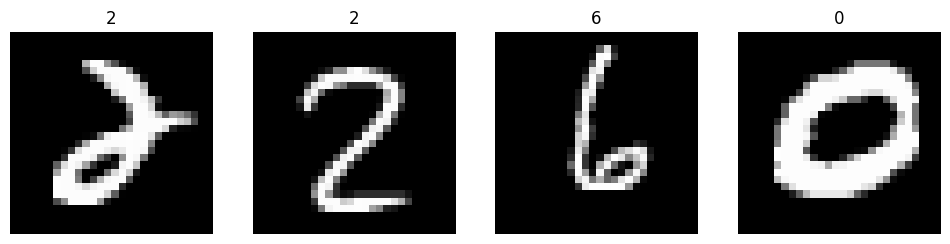

In [71]:
loaders.train.show_batch(max_n=4, nrows=1)

# Let's prepare a neural network for training

In [72]:
# squeezenet default fast ai learner
learn = vision_learner(loaders, squeezenet1_0, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)


# Get some details about the training

In [73]:
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 96 x 11 x 11   
Conv2d                                    14208      False     
ReLU                                                           
____________________________________________________________________________
                     64 x 96 x 5 x 5     
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 5 x 5     
Conv2d                                    1552       False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 5 x 5     
Conv2d                                    1088       False     
ReLU                                                           
Conv2d                                    9280

# Train (fine-tune) the neural network for one "epoch"

In [74]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.622476,1.405396,0.863833,01:43


# Let's grab the model and save it to a file

In [163]:
pytorch_model = learn.model.eval()
torch.save(pytorch_model, "my_fastai_mnist.pt")

# Now let's upload to a nano and do a predicion speed test

In [164]:
!./test_model_speed_on_nano.sh my_fastai_mnist.pt

Copying your model to nano...
my_fastai_mnist.pt                            100% 4998KB   6.3MB/s   00:00    
Running model speed test on nano...
Initializing nano model speed test on 'my_fastai_mnist.pt'...
Found test images...
Found model to test...
Importing ml packages...
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Preparing images...
Loading model file my_fastai_mnist.pt
Starting inference speed test...
prediction rate= 65.96608405141431
prediction rate= 69.93840579474148
prediction rate= 72.04332764004994
prediction rate= 68.06086966828956
prediction rate= 70.35435894683948
prediction rate= 72.59297762469642
prediction rate= 71.18969773966762
prediction rate= 71.86417964849832
prediction rate= 72.14601295083706
Timing test done.
Connection to 192.168.1.14